# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612/652, CS/IT 308 Machine Learning </center>
## <center> Lab#2 Bayes' classifier,k-means and k-NN</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [ ]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classes')
print(dataset)

Feature|Classes
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [ ]:
#write code here
classes=dataset[:,[1]] 
features=dataset[:,[0]]


In [ ]:
data0=features[classes==0]
data1=features[classes==1]
print(data0)
print(data1)


[3.39 3.58 2.28 1.34 3.11]
[7.42 5.74 9.17 7.79 7.93]


In [ ]:

classprob={}
classprob[0]=len(data0)/len(features)
classprob[1]=len(data1)/len(features)
print(classprob)



{0: 0.5, 1: 0.5}


### Find sample mean and sample standard deviation for each class 

In [ ]:
#write code here
def mean_stddev(x):
    n=len(x)
    sum_x=sum(x)
    meanx=sum_x/n
    var = sum((i - meanx)**2 for i in x) / n
    std_dev = var**0.5
    return meanx,std_dev



In [ ]:
#getting statistics for each class
stats={}
stats[0]=mean_stddev(data0)
stats[1]=mean_stddev(data1)
stats

0.8290476463991681


### Plot $p_1(x)$ and $p_2(x)$

In [ ]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    #write code here
    numerator = np.exp(- ((x-mean)**2 / (2 * stdev**2 )))
    denominator = np.sqrt(2 * np.pi )* stdev
    p=( numerator / denominator) 
    return p

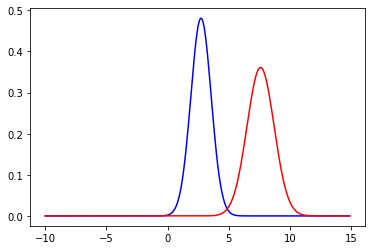

In [ ]:
x  = np.arange(-10,15,0.1)
plt.plot(x,calculate_probability(x,stats[0][0],stats[0][1]),'b',x,calculate_probability(x,stats[1][0],stats[1][1]),'r')

### Test for $x=3$  and $x=5$

In [ ]:
def class_probabilty(x):
    prob={}
    for c,j in stats.items():
      prob[c]=classprob[c]
      mean=j[0]
      std=j[1]
      prob[c]=prob[c]*calculate_probability(x, mean, std)
    return prob         
          

In [ ]:
#for x=3
#write code here
x=3
y=class_probabilty(x)
if y[0]>y[1] :
  print('class is 0')
else:
  print('class is 1') 
    

class is 0


In [ ]:
#for x=5
#write code here
x=5
y=class_probabilty(x)
if y[0]>y[1] :
  print('class is 0')
else:
  print('class is 1') 

class is 1


In [ ]:
# to optimise the above 
def test_check(x):
    y=class_probabilty(x)
    if y[0]>y[1] :
        print('class is 0')
    else:
        print('class is 1')

test_check(5)  
      

class is 1


## Homework:
1. Try for this 2-D data using classnote.
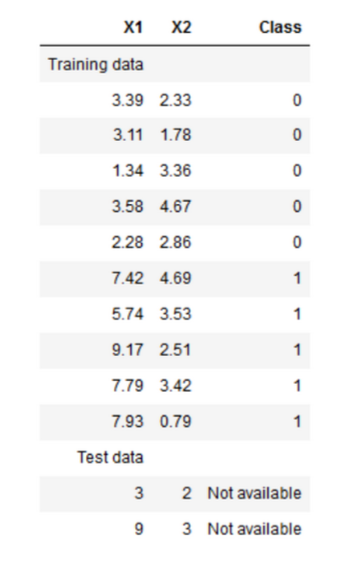 
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [ ]:
#write code here
# first for the two d dataset 
# step 1 get the data
dataset= np.array([[3.39,2.33,0],[3.11,1.78,0],[1.34,3.36,0],[3.58,4.67,0],[2.28,2.86,0],[7.42,4.69,1],[5.74,3.53,1],[9.17,2.51,1],[7.79,3.42,1],[7.93,0.79,1]])
# get the classes and their respective features
#separating data with classes
data={}
for x in dataset:
  if x[2] not in data:
     data[x[2]]=[]
  data[x[2]].append((x[0],x[1]))   
data


{0.0: [(3.39, 2.33), (3.11, 1.78), (1.34, 3.36), (3.58, 4.67), (2.28, 2.86)],
 1.0: [(7.42, 4.69), (5.74, 3.53), (9.17, 2.51), (7.79, 3.42), (7.93, 0.79)]}

In [ ]:
#calculate prior prob
classprob={}
for i,j in data.items():
   classprob[i]=len(j)/10
print(classprob)

{0.0: 0.5, 1.0: 0.5}


In [ ]:
#stats for each class using the function already described
stats={}
for i,j in data.items():
    stats[i]=[]
    for coloumn in zip(*j):
        y=mean_stddev(coloumn)
        stats[i].append(y)
stats    

{0.0: [(2.7399999999999998, 0.8290476463991681), (3.0, 0.9874613916503266)],
 1.0: [(7.609999999999999, 1.1046628444914763),
  (2.9880000000000004, 1.2989903771775988)]}

In [ ]:
def prob_class(stats,x):
     prob={}
     for c,j in stats.items():
       prob[c]=classprob[c]
       for i in range(len(j)):
           mean,std=j[i]
           prob[c]=prob[c]*calculate_probability(x[i], mean, std)
     return prob 


In [ ]:
test_case=[[3,2],[9,3]]
y= prob_class(stats,test_case[0])
print(y)
z= prob_class(stats,test_case[1])
print(z)
def test_check(y):
    if y[0]>y[1] :
        print('class is 0')
    else:
        print('class is 1')
print('test for [3,2]')  
test_check(y)  
print('test for [9,3]')
test_check(z)
  

{0.0: 0.05541618020856703, 1.0: 6.863593819199928e-06}
{0.0: 4.045989191269353e-14, 1.0: 0.025125877543362218}
test for [3,2]
class is 0
test for [9,3]
class is 1


In [ ]:
#iris data set naive bayes
from sklearn import datasets
iris = datasets.load_iris()
data=iris.data
X = iris.data
y = iris.target
#separating data by classes
data0 = X[y == 0]
data1 = X[y == 1]
data2 = X[y == 2]
#calculate prior probabilities p1,p2,p3
classprob={}
classprob[0]=len(data0)/len(X)
classprob[1]=len(data1)/len(X)
classprob[2]=len(data2)/len(X)
print(classprob)


{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.3333333333333333}


In [ ]:
stats={}
stats[0]=mean_stddev(data0)
stats[1]=mean_stddev(data1)
stats[2]=mean_stddev(data2)
stats

{0: (array([5.006, 3.428, 1.462, 0.246]),
  array([0.34894699, 0.37525458, 0.17191859, 0.10432641])),
 1: (array([5.936, 2.77 , 4.26 , 1.326]),
  array([0.51098337, 0.31064449, 0.46518813, 0.19576517])),
 2: (array([6.588, 2.974, 5.552, 2.026]),
  array([0.62948868, 0.31925538, 0.54634787, 0.27188968]))}

In [ ]:
import math

In [ ]:
sep={}
for i,j in zip(data,y):
  if k not in sep:
    sep[k]=[]
  sep[k].append((i[0],i[1],i[2],i[3]))
    
stat = {}
for c, f in sep.items():
  stat[c] = []
  for column in zip(*f):
    mean = sum(column) / len(column)
    var = sum([(x - mean)**2 for x in column]) / (len(column)-1)

    stat[c].append((mean, var**0.5))


In [ ]:
test=np.array([[5.7, 2.9, 4.2, 1.3]])
y=prob_class(stat,test[0])
y

{3: 0.056264622496228336}

MAM ,
I will submit KNN and Kmeans separately again in the part 2 .
Here i have not done Kmeans fully 

## 2. K-Nearest neighbour (KNN)

Consider the following observations:
<br>
>Sr.No. | Feature 1 | Feature 2 | Class
>--- | --- | --- | ---
Training data
>1 | -2 | -1 | C1
>2 | -2 |  1 | C2
>3 | -2 |  2 | C2
>4 | -1 | -1 | C1
>5 |  1 | -1 | C1
>6 |  1 |  1 | C3
>7 |  1 |  2 | C3
>8 |  2 |  1 | C3
Test data
>1 | -1 |  1 | Not available

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [ ]:
import numpy as np
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [ ]:
# to calculate distances
def euclidean_distance(a,b):
  dist = np.sqrt(np.sum(np.square(a-b)))
  return dist
# to find the k nearest neighbour for the new point in the dataset
def KNN(K,X_train,new_point): 
    neighbours=[]
    # find distances from the new_point to all the points in the training dataset
    for i in range(len(X_train)):
        dist=euclidean_distance(X_train[i],new_point)
        #appending distance and the index of the training data point
        neighbours.append([i,dist])
    #sort them according to distance in O(nlogn)    
    neighbours=sorted( neighbours,key = lambda x : x[1])
    return  neighbours[0:K]    

In [ ]:
from collections import Counter
def classify( neighbours):
    #extracting classes 
    #get the classes of the k nearest neighbours from y_train which stores class labels
    classes=np.array([Y_train[i[0]] for i in  neighbours])
    #then we get the most common element 
    index=classes[1].argmax()
    output=classes[0][index]     
    #Counter(classes).most_common(1)[0][0]
    return output

In [ ]:
X_train=data[:,[0,1]]
Y_train=data[:,[2]]

In [ ]:
new_points=np.array([[1,-1]])
knn=KNN(3,X_train,new_points[0])
classify(knn)

1.0

## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

In [ ]:

X = data[:,:-1]
m,n = X.shape
X


array([[-2., -1.],
       [-2.,  1.],
       [-2.,  2.],
       [-1., -1.],
       [ 1., -1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 2.,  1.]], dtype=float32)

In [ ]:
c1=X[5:8,:]
centroid={}
centroid[0]=np.average(c1, axis=0)
print(c1)
print(centroid)

[[1. 1.]
 [1. 2.]
 [2. 1.]]
{0: array([1.3333334, 1.3333334], dtype=float32)}


In [ ]:
centroid = {}
#write code here
#initial classes are given
c1=X[:2,:]
c2=X[2:5,:]
c3=X[5:8,:]

centroid[0]=np.average(c1,axis=0)
centroid[1]=np.average(c2,axis=0)
centroid[2]=np.average(c3,axis=0)
arr=[]
arr.append([centroid[0],centroid[1],centroid[2]])
cent=np.asarray(arr)
print('intial centroids = \n',cent)



intial centroids = 
 [[[-2.         0.       ]
  [-0.6666667  0.       ]
  [ 1.3333334  1.3333334]]]


centroids = 
 [[-2.          0.        ]
 [-0.66666669  0.        ]
 [ 1.33333337  1.33333337]]


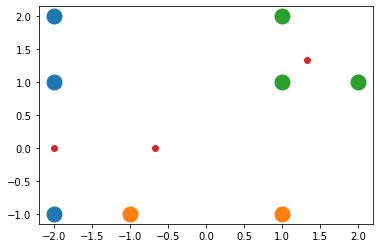

centroids = 
 [[-2.          0.66666667]
 [ 0.         -1.        ]
 [ 1.33333333  1.33333333]]


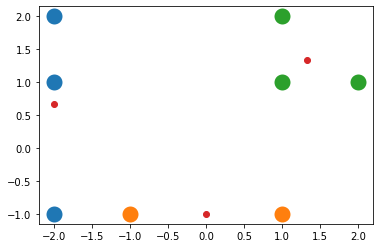

Feature1|Feature2|Class
[[-2. -1.  0.]
 [-2.  1.  0.]
 [-2.  2.  0.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  2.]
 [ 1.  2.  2.]
 [ 2.  1.  2.]]


In [ ]:
#write code for kmeans
